In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head(1)

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive


In [3]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

<small>

In this dataset, `price` is the **target variable** — the value we want our machine learning model to predict.

- Rows with missing target values cannot be used for supervised learning tasks.
- Keeping them would introduce noise and confuse the model.
- Filling missing `price` values with the mean, median, or any other statistic is not appropriate because it:
  - Introduces bias into the target.
  - Reduces the natural variance in the data.
  - Can lead to poor generalization and model performance.

**Therefore, it is best practice to drop rows where `price` is missing.**

In [4]:
df = df.dropna(subset=['price'])

**🟢 Engine Column**

In [ ]:
# Saving unique values of 'Engine' column to analyse

unique_engines = df['engine'].unique()

with open('lookups/unique_engines.txt', 'w', encoding='utf-8') as f:
    for item in unique_engines:
        f.write(str(item) + '\n')

<small>

From `Engine` column we have some data in format of VIN number so we have to extract engine information from number.

In [6]:
pattern = r"<dt>VIN</dt>\s*([A-Za-z0-9]+)"
for text in df['engine'].dropna():  
    matches = re.findall(pattern, text)
    if matches:
        print(matches)
    

['ZACNDFAN0R3A12168']
['1V2BMPE85RC003636']
['ZACNDFAN0R3A12168']
['3GN7DNRPXRS232327']
['1FMUK7HH1SGA05728']
['3C63R3HLXRG198198']
['SADHM2S12R1631756']
['7FARS4H71SE000866']


<small>

Here can use API to extract engine information from vehicle database website.   

**ZACNDFAN0R3A12168**: "Gasoline 2.0L VVT DOHC 4-cylinders All-wheel Drive Automatic Direct injection Turbo",   
**1V2BMPE85RC003636**: "Electric Rear-wheel Drive Automatic",  
**3GN7DNRPXRS232327**: "Electric Front-wheel Drive Automatic",  
**1FMUK7HH1SGA05728**: "Gasoline 2.3L VVT DOHC 4-cylinders Rear-wheel Drive Automatic Direct injection Turbo TI-VCT",   
**3C63R3HLXRG198198**: "Diesel 6.7L OHV 6-cylinders Four-wheel Drive Automatic Turbo",  
**SADHM2S12R1631756**: "Electric All-wheel Drive Automatic",  
**7FARS4H71SE000866**: "Gasoline 1.5L DOHC 4-cylinders Four-wheel Drive Direct injection Turbo i-VTEC"  

We will change it in dataframe.

In [7]:
pattern = r"<dt>VIN</dt>\s*([A-Za-z0-9]+)"
vin_data = {
    "ZACNDFAN0R3A12168": "Gasoline 2.0L VVT DOHC 4-cylinders All-wheel Drive Automatic Direct injection Turbo", 
    "1V2BMPE85RC003636": "Electric Rear-wheel Drive Automatic",
    "3GN7DNRPXRS232327": "Electric Front-wheel Drive Automatic",
    "1FMUK7HH1SGA05728": "Gasoline 2.3L VVT DOHC 4-cylinders Rear-wheel Drive Automatic Direct injection Turbo TI-VCT", 
    "3C63R3HLXRG198198": "Diesel 6.7L OHV 6-cylinders Four-wheel Drive Automatic Turbo",
    "SADHM2S12R1631756": "Electric All-wheel Drive Automatic",
    "7FARS4H71SE000866": "Gasoline 1.5L DOHC 4-cylinders Four-wheel Drive Direct injection Turbo i-VTEC"
}

def replace_with_vin_info(text):
    text = str(text) 
    match = re.search(pattern, text)
    if match:
        vin = match.group(1)
        return vin_data.get(vin, text)  
    return text  

df["engine"] = df["engine"].apply(replace_with_vin_info)

<small>

 **Engine Specifications Breakdown**

| **Category**       | **Details**                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| **Engine Type**    | V-8, V-6, I-6, I-4, I-3                                          |
| **Valve Count**    | 12V, 16V, 24V, 32V                                          |
| **Displacement**   | 1.3L – 6.7L                                                           |
| **Fuel System**    | - **GDI**: Gasoline Direct Injection <br> - **MPFI**: Multi-Port Fuel Injection <br> - **DDI**: Diesel Direct Injection <br> - **PDI**: Port/Direct Injection (Dual Injection) |
| **Valve Train**    | - **DOHC**: Dual Overhead Camshaft <br> - **OHV**: Overhead Valve (Pushrod) <br> - **SOHC**: Single Overhead Camshaft |
| **Aspiration**     | - **Turbo** <br> - **Twin-Turbo** <br> - **Intercooled Turbo** <br> - **Naturally Aspirated** |
| **Fuel Type**      | - **Gasoline** (Regular/Premium) <br> - **Diesel** <br> - **Hybrid** (Electric + Gas) <br> - **Flexible Fuel** (E85 Compatible) |
| **Variable Valve Technologies** | - **VVT**: Variable Valve Timing <br> - **CVVT**: Continuously Variable Valve Timing <br> - **i-VTEC**: Intelligent Variable Valve Timing and Lift Electronic Control  <br> - **D-CVVT**: Dual CVVT <br> - **Ti-VCT**: Twin Independent Variable Camshaft Timing <br> - **Multiair**  <br> - **CVVD**: Continuously Variable Valve Duration  <br> - **iVCT**: Independent Variable Camshaft Timing |

<small>

Here we will create 7 new columns named as   
`engine_type`  
`valve_count`    
`displacement`  
`fuel_system`  
`valve_train`  
`aspiration`  
`valve_tech`  

There are 2 columns are already present in dataset `fuel` and `cylinders`   
`cylinders` column has 102 missing values so we can fill that from engine info

In [8]:
def extract_features(engine_description):

    features = {
        'engine_type': None,
        'valve_count': None,
        'displacement': None,
        'fuel_system': None,
        'valve_train': None,
        'aspiration': False,
        'valve_tech': None,
        'cylinder_count': None,
    }

    engine_desc = str(engine_description.lower().strip())

    # Extracting engine type (Inline or V-type)
    engine_type_match = re.search(r'([vi])-\d', engine_desc)
    if engine_type_match:
        features['engine_type'] = engine_type_match.group(1).upper()

    # Extracting valve count
    valve_match = re.search(r'(\d+)v', engine_desc)
    if valve_match:
        features['valve_count'] = int(valve_match.group(1))
    
    # Extracting displacement
    displacement_match = re.search(r'(\d*\.?\d+)\s?l', engine_desc)
    if displacement_match:
        features['displacement'] = float(displacement_match.group(1))
    
    # Extracting Fuel system type
    if 'gdi' in engine_desc or 'gasoline direct injection' in engine_desc or 'direct injection' in engine_desc:
        features['fuel_system'] = 'GDI'
    elif 'mpfi' in engine_desc:
        features['fuel_system'] = 'MPFI'
    elif 'ddi' in engine_desc or 'diesel direct injection' in engine_desc:
        features['fuel_system'] = 'DDI'
    elif 'pdi' in engine_desc or 'port/direct injection' in engine_desc:
        features['fuel_system'] = 'PDI'
    else:
        features['fuel_system'] = 'unknown'

    # Extracting Valve Train type
    if 'dohc' in engine_desc:
        features['valve_train'] = 'DOHC'
    elif 'sohc' in engine_desc:
        features['valve_train'] = 'SOHC'
    elif 'ohv' in engine_desc:
        features['valve_train'] = 'OHV'
    else:
        features['valve_train'] = 'unknown'

    
    # Extracting Aspiration type
    '''Note: For intercooled aspiration, if it appears as a mistyped or truncated form like 'oled', 
             it should be corrected to 'intercooled'.'''

    if 'intercooled' not in engine_desc and 'oled' in engine_desc:
        engine_desc = engine_desc.replace('oled', 'intercooled')

    if 'twin turbo' in engine_desc:
        features['aspiration'] = 'twin'
    elif 'intercooled turbo' in engine_desc:
        features['aspiration'] = 'intercooled'
    elif 'turbo' in engine_desc:
        features['aspiration'] = 'turbo'
    else:
        features['aspiration'] = 'natural'


    # Extracting Valve Technology
    tech_phrases = ['vvt', 'cvvt', 'i-vtec', 'd-cvvt', 'ti-vct', 'multiair', 'cvvd', 'ivct']
    for phrase in tech_phrases:
        if phrase in engine_desc:
            features['valve_tech'] = phrase.upper()
            break

    # Extracting Cylinder Count
    cylinder_match = re.search(r'(\d)-cylinders|i-(\d)|v-(\d)', engine_desc)
    cylinder_count = None
    if cylinder_match:
        cylinder_count = cylinder_match.group(1) or cylinder_match.group(2) or cylinder_match.group(3)
        if cylinder_count:
            features['cylinder_count'] = int(cylinder_count)

    
    return features

In [ ]:
features_df = df['engine'].apply(extract_features).apply(pd.Series)
df = pd.concat([df, features_df], axis=1)

<small>

Here, Cylinders column is also important but it has 102 missing values.  

In [ ]:
missing_cylinders_df = df[df['cylinders'].isna()]
result = missing_cylinders_df[['fuel']]
print(result['fuel'].value_counts(dropna=False))

fuel
Electric    94
NaN          7
Gasoline     1
Name: count, dtype: int64


<small>
 
We have extracted cylinder count from engine description. So we can use that to fill respective missing cylinder values.  
Most of missing values are of **Electric** vehicle.    
So, Electric vehicles has 0 cylinders hence we can fill missing values with 0

In [ ]:
# Filling missing values in 'cylinders' with values from 'cylinder_count'
df['cylinders'] = df['cylinders'].fillna(df['cylinder_count'])

# Remaining missing values in 'cylinders' will be filled with 0 as vehicles are electric
df['cylinders'] = df['cylinders'].fillna(0)

# Dropping the 'cylinder_count' column
df = df.drop(columns=['cylinder_count'])

In [12]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price               0
engine              0
cylinders           0
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     37
drivetrain          0
engine_type       853
valve_count       388
displacement      848
fuel_system         0
valve_train         0
aspiration          0
valve_tech        916
dtype: int64

<small>

Extracted features `engine_type`, `displacement`, `valve_tech` has more missing values (>80%) so we have to drop.  

In [13]:
df = df.drop(columns=['engine_type', 'displacement', 'valve_tech'])

<small>

`valve_count` has missing values which can be imputed from combination (cylinders + valve_train).   
Below table is derived from available data represents valves count

| Cylinders | DOHC | OHV | SOHC | Other |
|-----------|------|-----|------|-------|
| 3         | 12   | 6   | 12   |  12   |
| 4         | 16   | 8   | 16   |  16   |
| 6         | 24   | 24  | 24   |  24   |
| 8         | 32   | 16  | 32   |  32   |

In [ ]:
di = {
    (3, 'DOHC'): 12,
    (3, 'OHV'): 6,
    (3, 'SOHC'): 12,
    (3, 'unknown'): 12,
    
    (4, 'DOHC'): 16,
    (4, 'OHV'): 8,
    (4, 'SOHC'): 16,
    (4, 'unknown'): 16,
    
    (6, 'DOHC'): 24,
    (6, 'OHV'): 24,
    (6, 'SOHC'): 24,
    (6, 'unknown'): 24,
    
    (8, 'DOHC'): 32,
    (8, 'OHV'): 16,
    (8, 'SOHC'): 32,
    (8, 'unknown'): 32
}

df['valve_count'] = df.apply(
    lambda row: di.get((row['cylinders'], row['valve_train']), row['valve_count'])
    if pd.isna(row['valve_count']) 
    else row['valve_count'],
    axis=1
)

# Remaining vehicles are electric and do not have valves so filling with 0
df['valve_count'] = df['valve_count'].fillna(0)

**🟢 Transmission Column**

In [15]:
print(df.loc[df['transmission'].isna(), 'name'])

725            2024 Mercedes-Benz EQS 450 Base 4MATIC
940    2024 Ford Transit-350 148 WB Medium Roof Cargo
Name: name, dtype: object


<small>

All vehichles with name '2024 Mercedes-Benz EQS 450 Base 4MATIC' and '2024 Ford Transit-350 148 WB Medium Roof Cargo' have Transmission as **Automatic**

In [16]:
df['transmission'] = df['transmission'].fillna('Automatic')

In [ ]:
# Saving unique values of 'transmission' column to analyse

unique_transmission = df['transmission'].value_counts()

with open('lookups/unique_transmissions.txt', 'w', encoding='utf-8') as f:
    for transmission, count in unique_transmission.items():  
        f.write(f"{transmission} : {count}\n")  

<small>

From above data we can extract two new features:

| **Category**            | **Details**                              |
|-------------------------|-----------------------------------------|
| **Transmission Type**   | - CVT (Continuously Variable Automatic)<br>  - DSG (Direct-Shift Gearbox)<br>   - DCT (Dual Clutch Transmission)<br>   - Shiftable<br>     - Automatic |
| **Gear**                | 6, 7, 8, 9, 10                          |  

Here we can create two new columns:  

- `transmission_type`  
- `gears`  

In [18]:
def extract_features(transmission_description):

    features = {
        'transmission_type': None,
        'gears': None,
    }

    trans_desc = str(transmission_description.lower().strip())

    # Extracting transmission type
    if 'cvt' in trans_desc:
        features['transmission_type'] = 'CVT'
    elif 'dsg' in trans_desc:
        features['transmission_type'] = 'DSG'
    elif 'dct' in trans_desc or 'dual clutch' in trans_desc:
        features['transmission_type'] = 'DCT'
    elif 'shift' in trans_desc or 'shiftable' in trans_desc or 'shifters' in trans_desc:
        features['transmission_type'] = 'shiftable'
    elif 'automatic' in trans_desc or 'a/t' in trans_desc:
        features['transmission_type'] = 'automatic'
    else:
        features['transmission_type'] = 'manual'

    # Extracting number of gears
    gear_match = re.search(r'(\d+)\s*(?:-speed|-spd|speed|spd)', trans_desc)
    if gear_match:
        features['gears'] = int(gear_match.group(1))
    
    
    return features

In [ ]:
features_df = df['transmission'].apply(extract_features).apply(pd.Series)
df = pd.concat([df, features_df], axis=1)

In [20]:
gear_per_model = df.groupby(['make', 'model'])['gears'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill missing gears using the mapped mode values
df['gears'] = df.apply(
    lambda row: gear_per_model.get((row['make'], row['model']), row['gears']) 
    if pd.isna(row['gears']) 
    else row['gears'],
    axis=1
)

Remaining missing gears values correspond to automatic vehicles, so they can be filled using the mode of gears for automatic transmissions.

In [21]:
# Transmission types 
trans_types = ['automatic', 'CVT', 'shiftable', 'DSG', 'manual', 'DCT']

# Mode of gears for each transmission_type
gears_mode_per_trans = df[df['transmission_type'].isin(trans_types)].groupby('transmission_type')['gears'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Filling missing gears using the corresponding transmission_type mode
df['gears'] = df.apply(
    lambda row: gears_mode_per_trans[row['transmission_type']]
    if pd.isna(row['gears']) and row['transmission_type'] in gears_mode_per_trans
    else row['gears'],
    axis=1
)

**🟢 Fuel Column**

<small>

`fuel` column has only 7 values missing and all have engine named as 'c' or 'electric' so we can fill fuel value as **electric**

In [22]:
df['fuel'] = df['fuel'].fillna('Electric')

**🟢 Trim Column**

<small>

`trim` column has only 1 value missing and we can fill it with unkown.

In [23]:
df['trim'] = df['trim'].fillna('unkown')

In [ ]:
# Saving unique values of 'trim' column to analyse

unique_trim = df['trim'].value_counts()

with open('lookups/unique_trim.txt', 'w', encoding='utf-8') as f:
    for trim, count in unique_trim.items():  
        f.write(f"{trim} : {count}\n")  

<small>

The `trim` column has high cardinality with 198 unique values.   
To reduce complexity, we retain categories with more than or equal to 3 occurrences—preserving 85% of the data  
—and group the rest into an **"Unknown"** category, reducing the total categories to 87.

In [25]:
value_counts = df['trim'].value_counts()
valid_trims = value_counts[value_counts >= 3].index

df['trim'] = df['trim'].apply(lambda x: x if x in valid_trims else 'Unknown')

**🟢 Body Column**

<small>

The `body` column has **3 missing values**.  
These can be imputed based on a combination of the following features:
- `make`
- `fuel`
- `trim`

By leveraging these attributes, we can infer the most likely `body` type for the missing entries.

In [26]:
missing_body = df[df['body'].isna()]

for idx, row in missing_body.iterrows():
    subset = df[
        (df['make'] == row['make']) &
        (df['fuel'] == row['fuel']) &
        (df['trim'] == row['trim']) &
        (df['body'].notna())
    ]
    
    if not subset.empty:
        most_common_body = subset['body'].mode()[0]
        df.at[idx, 'body'] = most_common_body

**🟢 Door Column**

In [27]:
df['doors'].value_counts()

doors
4.0    925
3.0     37
2.0      9
5.0      1
Name: count, dtype: int64

<small>

From above, we can see that over 95% of vehicles have 4 doors and the `doors` column has only 7 missing values.  
So, we can fill missing values with 4 because it's the dominant and most likely door count, minimizing risk of incorrect imputation with a simple and effective approach.

In [28]:
df['doors'] = df['doors'].fillna(4)

**🟢 Exterior colour Column**

In [29]:
df['exterior_color'].nunique()

262

In [ ]:
# Saving unique values of 'exterior_color' column to analyse

unique_exterior_colour = df['exterior_color'].value_counts()

with open('lookups/unique_exterior_colour.txt', 'w', encoding='utf-8') as f:
    for color, count in unique_exterior_colour.items():  
        f.write(f"{color} : {count}\n")  

<small>

The dataset contains 262 unique exterior_color values, which is high cardinality.

To reduce dimensionality:  
- Keeping color names with value count > 5 as individual labels.
- Grouping all other rare colors into broader color categories:
- {`white`, `black`, `gray`, `silver`, `red`, `blue`, `green`, `brown`, `gold`, `orange`, `purple`, `other`}

This helps improve model performance by reducing noise and sparsity in categorical features.

In [31]:
df['exterior_color'] = df['exterior_color'].fillna('other')

color_counts = df['exterior_color'].value_counts()
common_colors = color_counts[color_counts > 5].index

def simplify_color(color):
    if color in common_colors:
        return color.lower()
    
    color_lower = color.lower()
    
    # Broad color category matching
    if 'white' in color_lower:
        return 'white'
    elif 'black' in color_lower or 'ebony' in color_lower or 'obsidian' in color_lower:
        return 'black'
    elif 'gray' in color_lower or 'grey' in color_lower or 'granite' in color_lower or 'slate' in color_lower:
        return 'gray'
    elif 'silver' in color_lower or 'zinc' in color_lower:
        return 'silver'
    elif 'red' in color_lower or 'scarlet' in color_lower or 'crimson' in color_lower:
        return 'red'
    elif 'blue' in color_lower or 'navy' in color_lower or 'aqua' in color_lower:
        return 'blue'
    elif 'green' in color_lower or 'emerald' in color_lower or 'olive' in color_lower or 'cactus' in color_lower:
        return 'green'
    elif 'brown' in color_lower or 'bronze' in color_lower or 'stone' in color_lower:
        return 'brown'
    elif 'gold' in color_lower or 'champagne' in color_lower:
        return 'gold'
    elif 'orange' in color_lower or 'cayenne' in color_lower:
        return 'orange'
    elif 'purple' in color_lower or 'plum' in color_lower:
        return 'purple'
    else:
        return 'other'


df['ext_color'] = df['exterior_color'].apply(simplify_color)

In [32]:
df['ext_color'].nunique()

45

The cardinality has now been reduced from 262 to 45

**🟢 Interior colour Column**

In [33]:
df['interior_color'].nunique()

90

In [ ]:
# Saving unique values of 'interior_color' column to analyse

unique_interior_colour = df['interior_color'].value_counts()

with open('lookups/unique_interior_colour.txt', 'w', encoding='utf-8') as f:
    for color, count in unique_interior_colour.items():  
        f.write(f"{color} : {count}\n")  

<small> 

The original data contains **90 unique interior color categories**.   
To reduce cardinality, we retain categories covering **85% of the data** by keeping those with a **value count > 4**.   
The remaining rare categories are grouped into broader color classes. 

In [35]:
df['interior_color'] = df['interior_color'].fillna('other')

In [36]:
color_counts = df['interior_color'].value_counts()
common_colors = color_counts[color_counts > 4].index

def simplify_color(color):
    if color in common_colors:
        return color.lower()
    
    color_lower = color.lower()
    
    # Broad color category matching
    if 'black' in color_lower:
        return 'black'
    elif 'white' in color_lower or 'ivory' in color_lower or 'light platinum' in color_lower or 'oyster' in color_lower:
        return 'white'
    elif 'gray' in color_lower or 'grey' in color_lower or 'gry' in color_lower:
        return 'gray'
    elif 'brown' in color_lower or 'mocha' in color_lower or 'walnut' in color_lower :
        return 'brown'
    elif 'red' in color_lower or 'ruby' in color_lower or 'burgundy' in color_lower :
        return 'red'
    elif 'blue' in color_lower or 'navy' in color_lower:
        return 'blue'
    elif 'green' in color_lower:
        return 'green'
    elif 'silver' in color_lower or 'steel' in color_lower:
        return 'silver'
    else:
        return 'other'
    
df['int_color'] = df['interior_color'].apply(simplify_color)

In [37]:
df['int_color'].nunique()

22

The cardinality has now been reduced from 90 to 22

**🟢 Mileage Column**

In [38]:
df['mileage'].describe()

count     945.000000
mean       67.348148
std       510.839452
min         0.000000
25%         4.000000
50%         8.000000
75%        13.000000
max      9711.000000
Name: mileage, dtype: float64

<small>

The large gap between the **75th percentile** and the **maximum** value indicates the presence of outliers and suggests that the mileage data is messy or contains anomalies.  

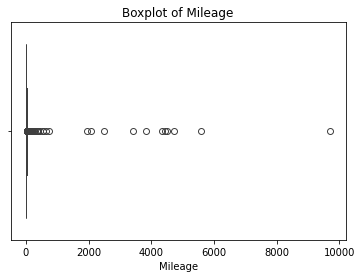

In [39]:
sns.boxplot(x=df['mileage'])
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')
plt.show()

<small>

Outliers can distort analysis and lead to misleading insights. One common way to detect and filter extreme values is by using the `Interquartile Range (IQR) method`.

In [40]:
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = round(Q3 + 1.5 * IQR)
print(upper_bound)

26


In [41]:
count_above = (df['mileage'] > upper_bound).sum()
print(f"Number of mileage values that are outlier: {count_above}")

Number of mileage values that are outlier: 97


In [42]:
df['mileage'] = df['mileage'].apply(lambda x: upper_bound if x > upper_bound else x)

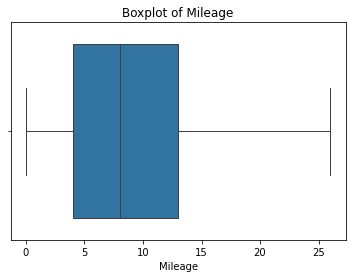

In [43]:
sns.boxplot(x=df['mileage'])
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')
plt.show()

In [44]:
df['mileage'] = df['mileage'].fillna(round(df['mileage'].mean()))

**🟢 Drivetrain Column**

In [45]:
df['drivetrain'].isnull().sum()

0

In [46]:
df['drivetrain'].value_counts()

drivetrain
All-wheel Drive      445
Four-wheel Drive     324
Front-wheel Drive    138
Rear-wheel Drive      72
Name: count, dtype: int64

Now, dropping original columns from where we extracted new features

In [47]:
df = df.drop(columns=['name', 'description', 'engine', 'transmission', 'exterior_color', 'interior_color', ])

In [48]:
df.drop(columns=['price']).nunique()

make                  28
model                151
year                   3
cylinders              5
fuel                   7
mileage               27
trim                  87
body                   8
doors                  4
drivetrain             4
valve_count            5
fuel_system            5
valve_train            4
aspiration             4
transmission_type      6
gears                  6
ext_color             45
int_color             22
dtype: int64

### Final Dataset

In [ ]:
df.to_csv('dataset_processed.csv', index=False)